First 5 rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Accuracy: 0.8935087913303107

Classification Report:
               precision    recall  f1-sco

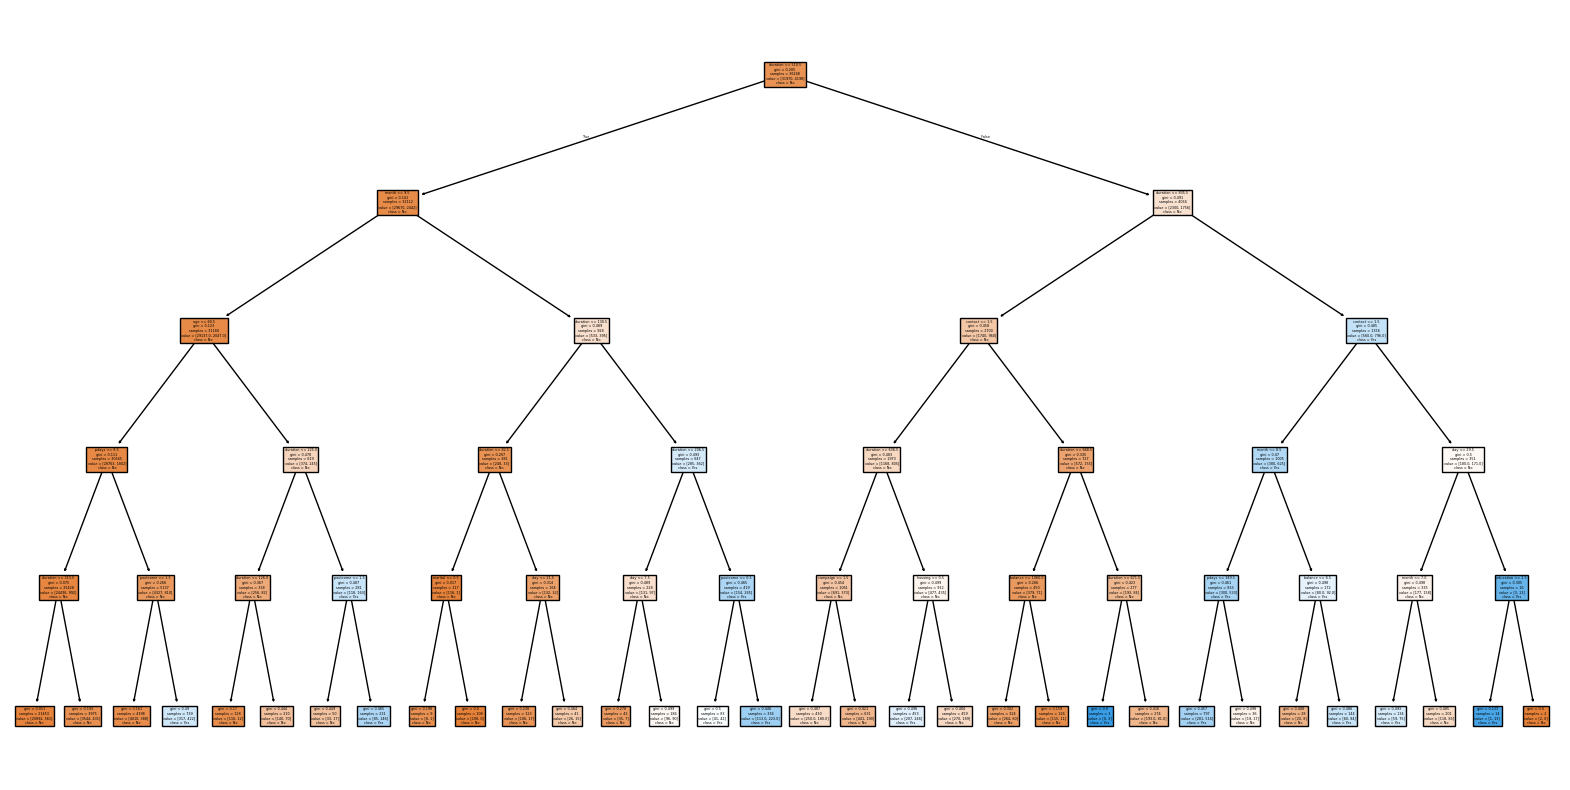

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load dataset
df = pd.read_csv("bank-full.csv", sep=';')

print("First 5 rows:\n", df.head())

# ----------------------------
# Data Preprocessing
# ----------------------------

# Convert categorical columns to numerical
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Features and Target
X = df.drop("y", axis=1)  # target column is 'y'
y = df["y"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# Model Building
# ----------------------------

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------------
# Visualize Decision Tree
# ----------------------------

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()
